# Inspect DDI Train data to test rules

Notebook to test Parser, rules and features for the DDI Train dataset.

> NOTE: StanfordCoreNLP needs to be running on a terminal before using the noteboo. Use the following command:
```bash
java -mx4g -cp 'resources/stanford-corenlp/*' edu.stanford.nlp.pipeline.StanfordCoreNLPServer
```

In [1]:
# !/usr/bin/python3
from graphviz import Digraph
from nltk.parse.corenlp import CoreNLPDependencyParser
from os import listdir, system, path, makedirs
from xml.dom.minidom import parse

In [2]:
inputdir = "data/Train"
outputfile = "data/tmp/task9.2_BASELINE_999.txt"
DependencyParser = CoreNLPDependencyParser(url="http://localhost:9000")
import DDI_baseline as ddi

--------------------------------------
--------------------------------------
--------------------------------------

In [3]:
s = "The treatment of ewes with an intravenous (IV) injection of trichlorfon, insufficient to produce significant inhibition of erythrocyte acetylcholinesterase (AChE) activity, appeared to produce additive effects with those produced by subsequent treatment with 4 mg of coumaphos/kg/day. "
entities = {
    "DDI-MedLine.d1.s6.e0": {"offset": "60-70".split("-"), "text": "trichlorfon"},
    "DDI-MedLine.d1.s6.e1": {"offset": "267-275".split("-"), "text": "coumaphos"}
}
_is_ddi = True
_ddi_type = "effect"
print(f"Sentence:\n{s}")
print(f"\n{entities}\n")
print(f"DDI: {_is_ddi} - {_ddi_type}")

Sentence:
The treatment of ewes with an intravenous (IV) injection of trichlorfon, insufficient to produce significant inhibition of erythrocyte acetylcholinesterase (AChE) activity, appeared to produce additive effects with those produced by subsequent treatment with 4 mg of coumaphos/kg/day. 

{'DDI-MedLine.d1.s6.e0': {'offset': ['60', '70'], 'text': 'trichlorfon'}, 'DDI-MedLine.d1.s6.e1': {'offset': ['267', '275'], 'text': 'coumaphos'}}

DDI: True - effect


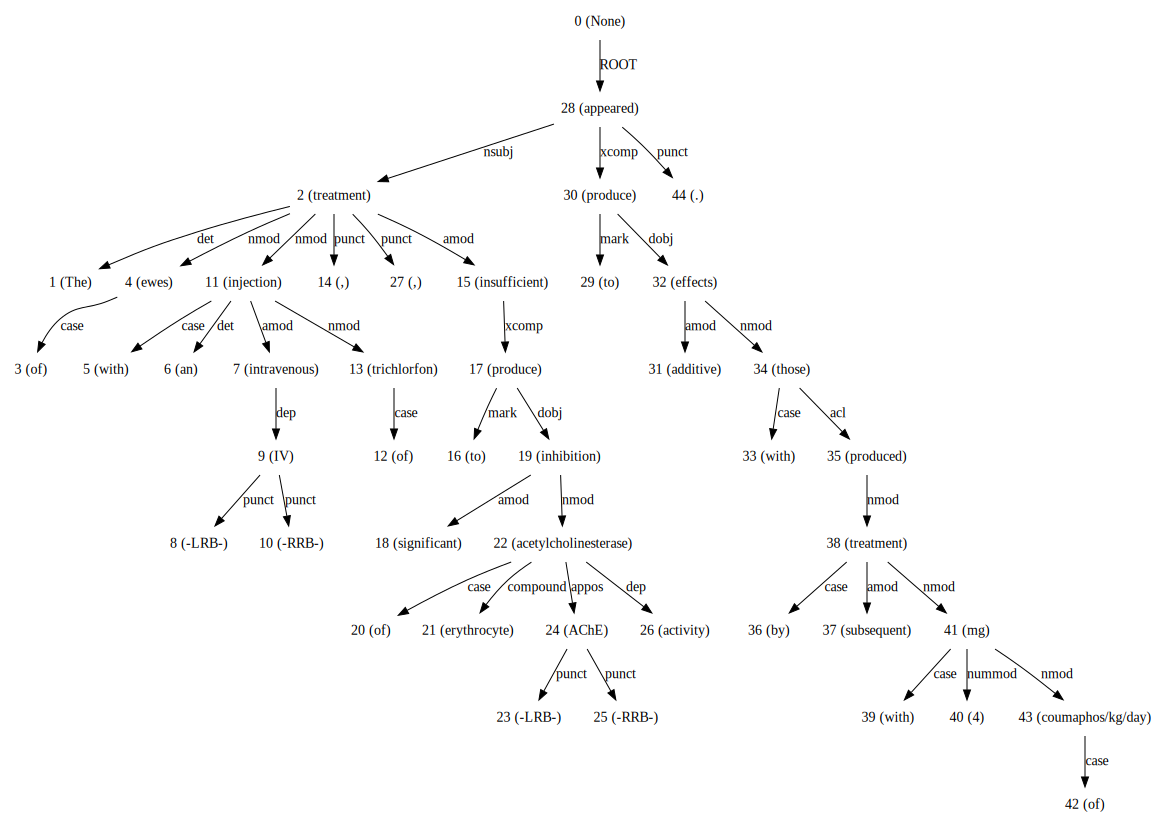

In [4]:
analysis, = DependencyParser.raw_parse(s)
analysis

In [5]:
nodes = analysis.nodes
effect_clues = ["produce", "administer", "potentiate", "prevent"]
clues = [n for n in nodes if nodes[n]['lemma'] in effect_clues]
print(clues)
nodes[clues[0]]

[17, 30, 35]


{'address': 17,
 'word': 'produce',
 'lemma': 'produce',
 'ctag': 'VB',
 'tag': 'VB',
 'feats': '_',
 'head': 15,
 'deps': defaultdict(list, {'mark': [16], 'dobj': [19]}),
 'rel': 'xcomp'}

In [6]:
e1, e2 = list(entities.keys())
ddi.check_interaction(analysis, entities, e1, e2)

('1', 'effect')

----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------

In [7]:
s = "Barbiturates and glutethimide should not be administered to patients receiving coumarin drugs."
entities = {
    "DDI-MedLine.d106.s6.e0": {"offset": "0-11".split("-"), "text": "Barbiturates"},
    "DDI-MedLine.d106.s6.e1": {"offset": "17-28".split("-"), "text": "glutethimide"},
    "DDI-MedLine.d106.s6.e2": {"offset": "79-92".split("-"), "text": "coumarin drugs"}
}
_is_ddi = True
_ddi_type = "advise"
print(f"Sentence:\n{s}")
print(f"\n{entities}\n")
print(f"DDI: {_is_ddi} - {_ddi_type}")

Sentence:
Barbiturates and glutethimide should not be administered to patients receiving coumarin drugs.

{'DDI-MedLine.d106.s6.e0': {'offset': ['0', '11'], 'text': 'Barbiturates'}, 'DDI-MedLine.d106.s6.e1': {'offset': ['17', '28'], 'text': 'glutethimide'}, 'DDI-MedLine.d106.s6.e2': {'offset': ['79', '92'], 'text': 'coumarin drugs'}}

DDI: True - advise


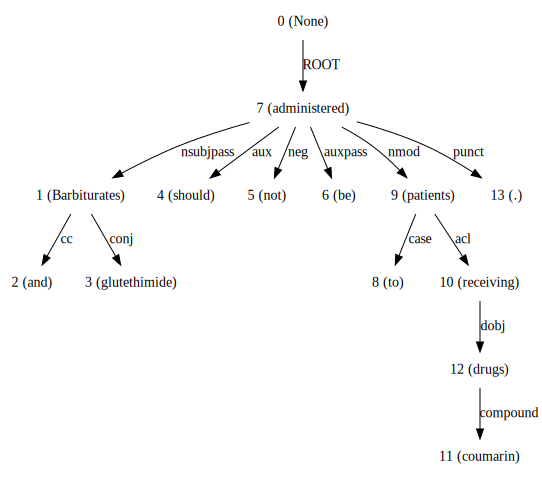

In [8]:
analysis, = DependencyParser.raw_parse(s)
analysis

In [9]:
e1, e2, e3 = list(entities.keys())
ddi.check_interaction(analysis, entities, e1, e3)

('1', 'advise')

In [10]:
ddi.check_interaction(analysis, entities, e2, e3)

('1', 'advise')